## Build Custom HOD Priors
This file processes saved posterior samples constrained using an observed n(z), and computes a custom prior which is then used in cmass.bias.tools.hod_models.

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import os
from os.path import join
import pickle
import json
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.style.use('../../style.mcstyle')   # noqa
import numpy as np
import torch
import seaborn as sns
import pandas as pd
import warnings
from tqdm import tqdm

# Suppress warnings
warnings.filterwarnings('ignore')

### MTNG

In [5]:
fname = '/anvil/projects/x-phy240043/x-csui/cmass_data/nz_hod_inference/pos/mtng_hod_pos.npy'
samples = np.load(fname)
print(samples.shape)

names = [
    'logMmin_z0',
    'logMmin_z1',
    'logMmin_z2',
    'sigma_logM',
    'logM0_z0',
    'logM0_z1',
    'logM0_z2',
    'logM1_z0',
    'logM1_z1',
    'logM1_z2',
    'alpha',
    'mean_occupation_centrals_assembias_param1',
    'mean_occupation_satellites_assembias_param1',
    'eta_vb_centrals',
    'eta_vb_satellites',
    'conc_gal_bias_satellites'
]
samples = pd.DataFrame(samples, columns=names)

(30000, 16)


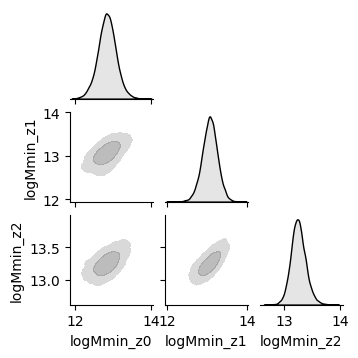

In [7]:
g = sns.pairplot(
    samples,
    vars=names[:3],
    kind='kde',
    plot_kws={
        'alpha': 0.5, 'levels': [0.05, 0.36, 1], 'fill': True,
        'common_norm': False, 'color': 'k'},
    diag_kws={'color': 'k', 'alpha': 0.1, 'fill': True},
    corner=True,
    height=1.2,
)
g.fig.subplots_adjust(wspace=0.15, hspace=0.15)

In [20]:
print(names[:3])
print('loc:', ', '.join([f'{samples[n].mean():.5f}' for n in names[:3]]))
print('scale:', ', '.join([f'{samples[n].std():.5f}' for n in names[:3]]))

['logMmin_z0', 'logMmin_z1', 'logMmin_z2']
loc: 12.83843, 13.05714, 13.25134
scale: 0.24210, 0.19465, 0.13425
